In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns




In [15]:
def get_feature_correlation(file_name="df_prime_train_features.csv"):
    data_df = pd.read_csv(file_name)
    # create a list of our conditions
    conditions = [
        (data_df['DRSS'] == 35) | (data_df['DRSS'] == 43),
        (data_df['DRSS'] == 47) | (data_df['DRSS'] == 53),
        (data_df['DRSS'] > 53)
        ]

    # create a list of the values we want to assign for each condition
    values = [0,1,2]

    # create a new column and use np.select to assign values to it using our lists as arguments
    data_df['DRSS Severity'] = np.select(conditions, values)

    # Drop folder from DataFrame
    data_df = data_df.drop(['Volume_ID'],axis=1)

    ## Normalize the data of each column
    data_df = data_df.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(4))

    correlation_mat = data_df.corr()
    
    sns.heatmap(abs(correlation_mat), annot = False)
    plt.show()
    return data_df,correlation_mat

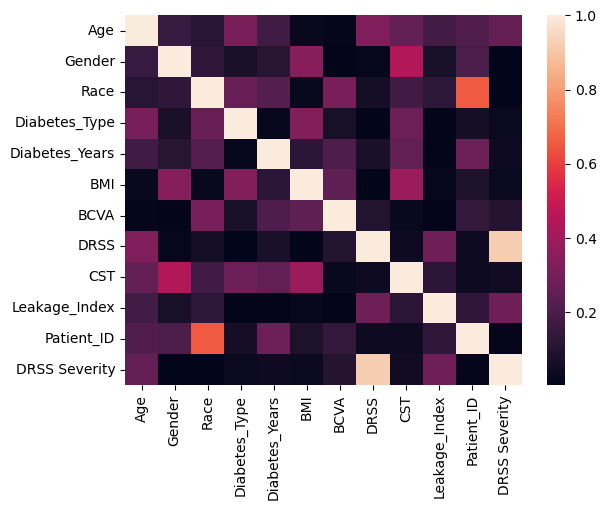

In [16]:
train_data, train_corr = get_feature_correlation("df_prime_train_features.csv")

,Age,Gender,Race,Diabetes_Type,Diabetes_Years,BMI,BCVA,CST,Leakage_Index,Patient_ID
DRSS Severity,-0.258409,0.004209,-0.007389,0.028159,-0.03678,-0.031384,-0.101208,-0.050755,0.284465,-0.013748


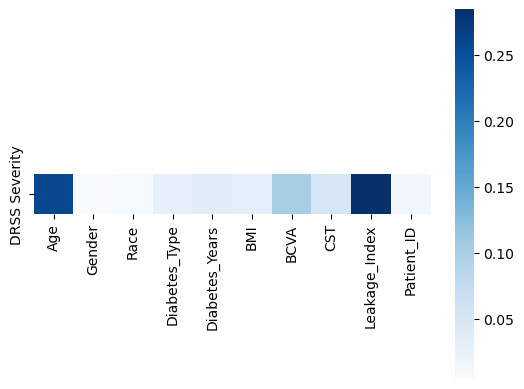

In [45]:
# a = train_corr.iloc[11].values.reshape(-1,1)
# print(a)
a = train_corr.iloc[[-1]].drop(['DRSS', 'DRSS Severity'], axis=1)
display(a)
sns.heatmap(abs(a), annot = False, cmap="Blues" , square=True)
plt.show()


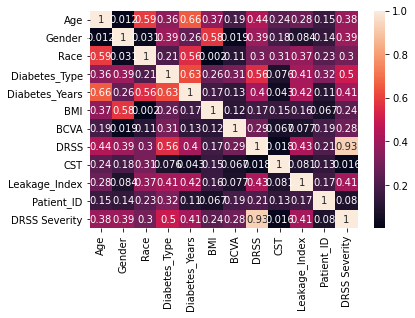

In [ ]:
test_data, test_corr = get_feature_correlation("df_prime_test_features.csv")

In [5]:
test_data

,Age,Gender,Race,Diabetes_Type,Diabetes_Years,BMI,BCVA,DRSS,CST,Leakage_Index,Patient_ID,DRSS Severity
0,1.0000,1.0,0.5,0.0,0.4643,0.5868,0.4375,0.2778,0.7927,0.5409,0.7500,0.0
1,1.0000,1.0,0.5,0.0,0.4643,0.5868,0.1250,0.2778,0.8031,0.6644,0.7500,0.0
2,0.6585,0.0,0.5,0.0,0.3929,0.0000,0.6875,0.6667,0.6943,0.9208,0.2500,0.5
3,0.6585,0.0,0.5,0.0,0.3929,0.0000,0.6562,0.7778,0.7254,0.9987,0.2500,1.0
4,0.6585,0.0,0.5,0.0,0.3929,0.0000,0.6250,0.7778,0.6995,0.9799,0.2500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.0000,0.0,0.0,0.0,1.0000,0.5520,0.2812,0.7778,0.6010,0.9302,0.1875,1.0
159,0.0000,0.0,0.0,0.0,1.0000,0.5520,0.2812,0.6667,0.5026,0.8980,0.1875,0.5
160,0.0000,0.0,0.0,0.0,1.0000,0.5520,0.2812,0.5000,0.6321,0.9450,0.1875,0.5
161,0.0000,0.0,0.0,0.0,1.0000,0.5520,0.2188,0.7778,0.7202,0.8913,0.1875,1.0


In [ ]:
def get_meta:
    